# Building a Handwritten Digit Classifier with scikit-learn

{{ badge }}

This Jupyter/Colab notebook is designed as an interactive hands-on exercise to complement the "Demystifying AI - An Introduction to AI, ML, and DL" talk. We will be using the scikit-learn library to create a model that can classify handwritten digits from the MNIST dataset.

**Key Learning Objectives:**
- Understand the practical application of machine learning concepts discussed in the talk.
- Get familiar with the process of training a machine learning model using scikit-learn.
- Explore the MNIST dataset and learn about classification tasks in machine learning.


## Exercise Overview

In this exercise, we will go through the essential steps of a machine learning project: loading data, preprocessing, model training, and evaluation. We will be working with the MNIST dataset, a classic in the machine learning community, often considered as the "Hello World" of machine learning.

**MNIST Dataset:**
- Comprises 70,000 images of handwritten digits (0-9).
- Each image is a 28x28 pixel grayscale representation of a digit.
- Commonly used for training various image processing systems.

**Model Building:**
- We will use scikit-learn, a powerful and easy-to-use Python library for machine learning.
- Our focus will be on creating a simple classifier to recognize handwritten digits.
- We will review and apply concepts like data splitting, training a model, making predictions, and evaluating model performance.

**What You Will Learn:**
- How to interact with datasets in a machine learning workflow.
- The process of training a classifier with scikit-learn.
- Evaluating the accuracy and effectiveness of a machine learning model.

*Note: This notebook assumes basic familiarity with Python programming and Jupyter/Colab environments.*

Let's dive into the world of machine learning with a hands-on approach!


## 1. Imports

Import necessary libraries for handling data, creating a model, and visualizing the results.

In [2]:
# Import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import scikit-learn for machine learning functionalities
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## 2. Load & Visualize Data

Load the MNIST dataset and visualize a few samples.

In [21]:
# Define a function to visualize the digits
def visualize_digits(dataset):
    _, axes = plt.subplots(1, 4, figsize=(10, 3))
    for ax, image, label in zip(axes, dataset.images, dataset.target):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Training: %i' % label)

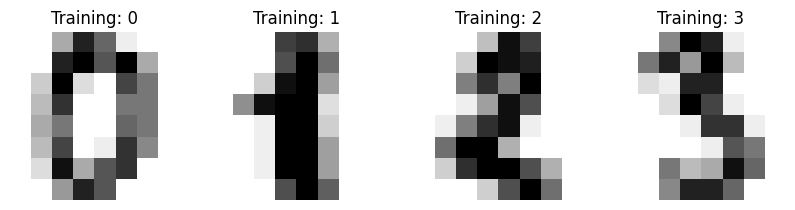

In [22]:
# Load the MNIST dataset
mnist = datasets.load_digits()

# Visualize the dataset
visualize_digits(mnist)

## 3. Prepare the data

Prepare the data for training by splitting it into training and test sets.

In [23]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.5)


## 4. Define and Train Model

Define a Support Vector Classifier (SVC) model and train it with the training data.


In [24]:
model = SVC()
model.fit(X_train, y_train)

SVC()

## 5. Evaluate Model

Evaluate the model's performance on the test data using metrics and a confusion matrix.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       0.97      0.99      0.98        93
           2       1.00      0.99      0.99        82
           3       1.00      0.97      0.98        87
           4       1.00      0.99      0.99        91
           5       0.98      0.98      0.98        97
           6       0.99      1.00      0.99        89
           7       0.99      0.99      0.99        89
           8       0.95      0.97      0.96        93
           9       0.97      0.97      0.97        95

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



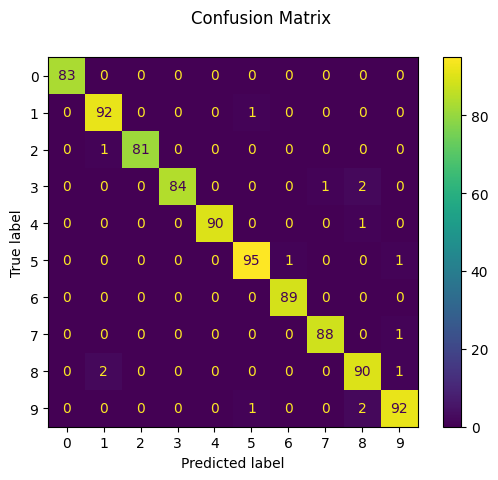

In [25]:
# Predicting labels for the test set
predicted = model.predict(X_test)

# Evaluation metrics
print(metrics.classification_report(y_test, predicted))

# Confusion Matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

## 6. Visualize Sample Predictions

Visualize sample predictions by the model on test data.


In [38]:
# Define a function to visualize model predictions
def visualize_predictions(samples, predictions):
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 3))

    for ax, image, prediction in zip(axes, samples, predictions):
        ax.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title(f'Prediction: {prediction}')
        ax.set_axis_off()

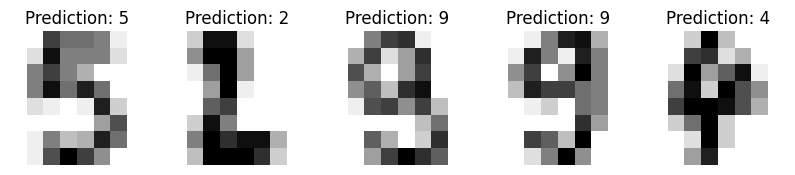

In [42]:
# Selecting a few sample images
num_samples = 5
samples = X_test[:num_samples]
labels = model.predict(X_test)

visualize_predictions(samples, labels)